In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
import requests
import json
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
import numpy as np

from config import nrel_key

In [3]:
fuel = "ELEC"
file_format = "csv"
access = "public"
#country = "US"

params = {
    "api_key": nrel_key,
    "fuel_type": fuel,
    "access": access
    }

base_url = f"https://developer.nrel.gov/api/alt-fuel-stations/v1.json?{params}"


response = requests.get(base_url, params=params).json()
#print(json.dumps(response,indent=4, sort_keys=True))

df = pd.DataFrame(response["fuel_stations"])
df

,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,open_date,...,rd_blends_fr,rd_blended_with_biodiesel,rd_max_biodiesel_level,access_days_time_fr,intersection_directions_fr,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,ev_network_ids,federal_agency
0,public,5:30am-9pm; pay lot,None,None,2023-01-10,None,ELEC,Public,1523,1995-08-30,...,None,None,None,None,None,None,Public,None,NaN,NaN
1,public,24 hours daily,None,None,2022-09-14,None,ELEC,Public,1583,1996-10-15,...,None,None,None,None,None,None,Public,None,NaN,NaN
2,public,24 hours daily,None,None,2023-01-10,None,ELEC,Public,6355,1997-07-30,...,None,None,None,None,None,None,Public,None,NaN,NaN
3,public,Dealership business hours,CALL,None,2021-12-09,None,ELEC,Public - Call ahead,6405,2012-12-11,...,None,None,None,None,None,None,Public - Appeler à l'avance,None,NaN,NaN
4,public,6am-12am daily,None,None,2020-02-06,None,ELEC,Public,6425,1997-08-30,...,None,None,None,None,None,None,Public,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54776,public,24 hours daily,None,None,2023-02-08,None,ELEC,Public,253731,2023-02-08,...,None,None,None,None,None,None,Public,None,"{'station': ['4094'], 'posts': ['1621063', '16...",NaN
54777,public,None,None,None,2023-02-09,None,ELEC,Public,253740,2023-02-09,...,None,None,None,None,None,None,Public,None,"{'station': ['425'], 'posts': ['1453_1', '1454...",NaN
54778,public,24 hours daily,None,A ACCOUNT_BALANCE D M V,2023-02-09,None,ELEC,Public,253741,2023-01-30,...,None,None,None,None,None,None,Public,None,"{'station': ['US-RIV-L1608467029'], 'posts': [...",NaN
54779,public,None,None,None,2023-02-09,None,ELEC,Public,253742,2023-02-09,...,None,None,None,None,None,None,Public,None,{'station': ['f9780d19-15b7-4c87-abbb-76939474...,NaN


In [4]:
#df.to_csv(r'export.csv')

In [5]:
df['country'].unique()

array(['US'], dtype=object)

In [6]:
list(df.columns)

['access_code',
 'access_days_time',
 'access_detail_code',
 'cards_accepted',
 'date_last_confirmed',
 'expected_date',
 'fuel_type_code',
 'groups_with_access_code',
 'id',
 'open_date',
 'owner_type_code',
 'status_code',
 'restricted_access',
 'station_name',
 'station_phone',
 'updated_at',
 'facility_type',
 'geocode_status',
 'latitude',
 'longitude',
 'city',
 'intersection_directions',
 'plus4',
 'state',
 'street_address',
 'zip',
 'country',
 'bd_blends',
 'cng_dispenser_num',
 'cng_fill_type_code',
 'cng_psi',
 'cng_renewable_source',
 'cng_total_compression',
 'cng_total_storage',
 'cng_vehicle_class',
 'e85_blender_pump',
 'e85_other_ethanol_blends',
 'ev_connector_types',
 'ev_dc_fast_num',
 'ev_level1_evse_num',
 'ev_level2_evse_num',
 'ev_network',
 'ev_network_web',
 'ev_other_evse',
 'ev_pricing',
 'ev_renewable_source',
 'hy_is_retail',
 'hy_pressures',
 'hy_standards',
 'hy_status_link',
 'lng_renewable_source',
 'lng_vehicle_class',
 'lpg_primary',
 'lpg_nozzle_ty

In [7]:
df_cleaned = df[["access_code","state",'zip','id']]

df_cleaned.head()

,access_code,state,zip,id
0,public,CA,90015,1523
1,public,CA,91731,1583
2,public,CA,92037,6355
3,public,CA,91343,6405
4,public,CA,92503,6425


In [8]:
df_cleaned['state'].unique()

array(['CA', 'VT', 'WA', 'OR', 'IL', 'ID', 'TX', 'FL', 'WI', 'IA', 'AZ',
       'MD', 'NJ', 'NY', 'SC', 'CT', 'OH', 'WV', 'MO', 'UT', 'KS', 'MA',
       'CO', 'IN', 'MI', 'LA', 'NC', 'VA', 'TN', 'AL', 'GA', 'HI', 'MN',
       'NV', 'AR', 'RI', 'PA', 'OK', 'DC', 'ME', 'NH', 'KY', 'NE', 'MS',
       'SD', 'DE', 'NM', 'MT', 'ND', 'WY', 'AK', 'PR', 'ON', 'QC', None,
       'KA'], dtype=object)

In [9]:
state_df = df_cleaned.groupby(['state']).count()['id']

print(state_df)

state
AK       60
AL      271
AR      227
AZ      985
CA    15096
CO     1826
CT      564
DC      287
DE      153
FL     2945
GA     1688
HI      368
IA      311
ID      119
IL     1288
IN      400
KA        1
KS      477
KY      240
LA      193
MA     2519
MD     1383
ME      415
MI     1159
MN      602
MO     1081
MS      101
MT      100
NC     1162
ND       82
NE      220
NH      183
NJ      961
NM      244
NV      527
NY     3561
OH     1257
OK      323
ON        8
OR     1028
PA     1352
PR       33
QC        2
RI      313
SC      434
SD       75
TN      667
TX     2611
UT      799
VA     1235
VT      357
WA     1795
WI      482
WV      124
WY       85
Name: id, dtype: int64


In [10]:
# zip_df = df_cleaned.groupby(['zip']).count()['id']

# print(zip_df)
# zip_df.to_csv(r'zip.csv')


In [11]:
ev_registration_path = "resources/ev_registration_by_state.csv"

registration_data = pd.read_csv(ev_registration_path)

registration_data.head()

,State Name,state,Registration Count
0,Alabama,AL,4750.0
1,Alaska,AK,1290.0
2,Arizona,AZ,40740.0
3,Arkansas,AR,2390.0
4,California,CA,563070.0


In [22]:
df_complete = pd.merge(state_df, registration_data, how = "left", on=["state"])

df_complete.rename(columns = {"id":"Number of EV Chargers"},inplace=True)

df_complete["Number of EV Chargers"].astype(float)

df_complete.dropna(inplace=True)

df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 54
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  51 non-null     object 
 1   Number of EV Chargers  51 non-null     int64  
 2   State Name             51 non-null     object 
 3   Registration Count     51 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ KB


In [23]:
df_complete['Registration Count'] = pd.to_numeric(df_complete['Registration Count'])

df_complete.info()

df_complete.to_csv(r'df_complete.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 54
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  51 non-null     object 
 1   Number of EV Chargers  51 non-null     int64  
 2   State Name             51 non-null     object 
 3   Registration Count     51 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ KB


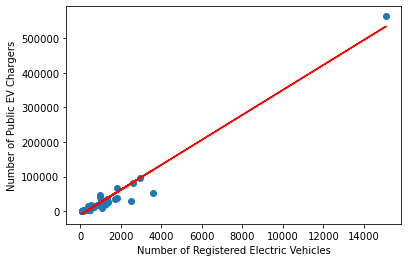

In [42]:
x_values = df_complete['Number of EV Chargers']
y_values = df_complete['Registration Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Number of Registered Electric Vehicles')
plt.ylabel('Number of Public EV Chargers')
plt.show()

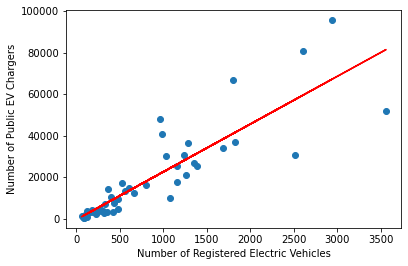

In [43]:
ca_removed = df_complete.loc[df_complete["state"] != "CA"]

ca_removed

x_values = ca_removed['Number of EV Chargers']
y_values = ca_removed['Registration Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Number of Registered Electric Vehicles')
plt.ylabel('Number of Public EV Chargers')
plt.show()

